# The Invasion of the Opioid Crisis on Life in the US

### A Data Science Project By Daniel Connolly and Bryce Mann

In this project, we will be investigating the opioid epidemic using data from the NSDUH. We hope to find interesting relationships between drug use and other variables measured by the NSDUH as well as the look at the use of opioids over time. In accordance with the guidelines of the NSDUH, we will not upload our data to our git repository and will not make any identifying information public through our study.

#### Reading the Data

We continually ran into memory errors trying to extract data from the 2002-2016 version of the NSDUH data. Eventually, we managed to get it to work for a few variables (less than 20) and so we ended up relying on that quite a bit in this report. However, we had not managed to make it work before going through the process of pickling the data for each individual year between 2002 and 2017, as you will see.

In [1]:
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from utils import decorate
from thinkstats2 import Hist, Pmf, Cdf
from thinkplot import Cdf
import seaborn as sns
sns.set(style='white')

In [2]:
import pandas as pd
import numpy as np

# Each individual year's full dataset 2002-2017
nsduh_2002 = pd.read_pickle('nsduh_2002.pkl')
nsduh_2003 = pd.read_pickle('nsduh_2003.pkl')
nsduh_2004 = pd.read_pickle('nsduh_2004.pkl')
nsduh_2005 = pd.read_pickle('nsduh_2005.pkl')
nsduh_2006 = pd.read_pickle('nsduh_2006.pkl')
nsduh_2007 = pd.read_pickle('nsduh_2007.pkl')
nsduh_2008 = pd.read_pickle('nsduh_2008.pkl')
nsduh_2009 = pd.read_pickle('nsduh_2009.pkl')
nsduh_2010 = pd.read_pickle('nsduh_2010.pkl')
nsduh_2011 = pd.read_pickle('nsduh_2011.pkl')
nsduh_2012 = pd.read_pickle('nsduh_2012.pkl')
nsduh_2013 = pd.read_pickle('nsduh_2013.pkl')
nsduh_2014 = pd.read_pickle('nsduh_2014.pkl')
nsduh_2015 = pd.read_pickle('nsduh_2015.pkl')
nsduh_2016 = pd.read_pickle('nsduh_2016.pkl')
nsduh_2017 = pd.read_pickle('nsduh_2017.pkl')

# A few variables we were able to extract from the NSDUH's provided 2002-2016 dataset
nsduh = pd.read_pickle('nsduh_all_final.pkl')

In [3]:
# An array to allow us to iterate through all the individual year's data
dfs = [nsduh_2002, nsduh_2003, nsduh_2004, nsduh_2005,nsduh_2006,
       nsduh_2007, nsduh_2008, nsduh_2009, nsduh_2010, nsduh_2011, 
       nsduh_2012, nsduh_2013, nsduh_2014, nsduh_2015, nsduh_2016, 
       nsduh_2017]

We wrote the make_categorical_numerical function below in order to try and change the categorical data, which were formatted as strings such as 'Yes - 1', difficult to work with, and made up nearly all of the data in the datasets, to numerical data so that we could perform numpy operations. It is designed to work on all of the categorical columns from each dataset.

In [4]:
def make_categorical_numerical(df):
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [5]:
for df in dfs:
    make_categorical_numerical(df)

#### Drug use over time

First we iterated through each individual year's data, trying to see how the percentage of drug users in the United States has changed since 2002.

In [6]:
d = dict()
d2 = dict()
d3 = dict()
d4 = dict()
for df in dfs:
    d[df['year'].iloc[0]] = 100*(len(df[df.herever == 0])/len(df))
    d2[df['year'].iloc[0]] = 100*(len(df[df.crkever == 0])/len(df))
    d3[df['year'].iloc[0]] = 100*(len(df[df.lsd == 0])/len(df))
    if (int(df['year'].iloc[1]) < 2015):
        d4[df['year'].iloc[0]] = 100*(len(df[df.anlever == 0])/len(df))

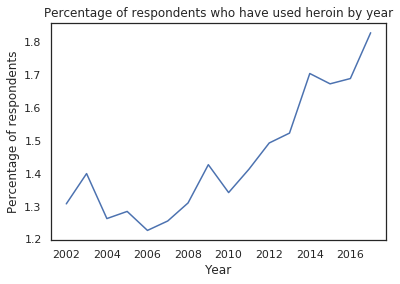

In [7]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, label='Heroin')
plt.xlabel('Year')
plt.ylabel('Percentage of respondents')
plt.title('Percentage of respondents who have used heroin by year')
plt.show()

The percentage of the total population that uses heroin appears to have increased by 0.5% between 2002 and 2016 (an increase of 40%). Given that we are looking into the opioid epidemic, we expected to see an increase. 0.5% of 320 million people in the United States is 1.625 million people. If the amount of people using heroin has increased by that much over the past fourteen years, something is definitely going on.

**Effect Size: +40%** (For reference, when we state the effect size, we are talking about the percent difference. In our opinion, this made the most sense for our application, as it is far easier to understand than other effect sizes such as the Cohen Effect Size. In this case, we compared the end percentage to the start percentage to calculate the effect size of 40%.)

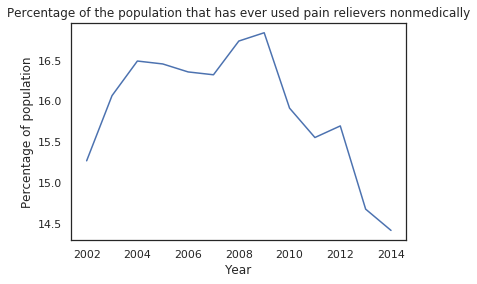

In [8]:
lists = sorted(d4.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples


plt.plot(x, y, label='Painkillers')
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used pain relievers nonmedically')
plt.show()

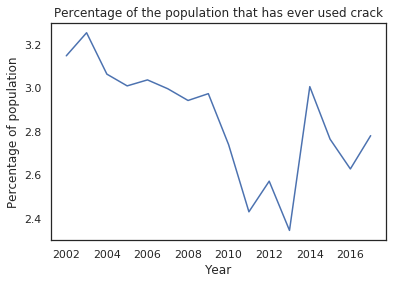

In [9]:
lists2 = sorted(d2.items()) # sorted by key, return a list of tuples
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples

plt.plot(x2, y2,label='crack')
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used crack')
plt.show()

**Effect Size: -13%**

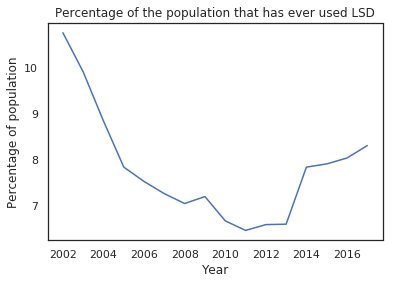

In [10]:
lists3 = sorted(d3.items()) # sorted by key, return a list of tuples
x3, y3 = zip(*lists3) # unpack a list of pairs into two tuples

plt.plot(x3, y3, label='lsd')
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used LSD')
plt.show()

**Effect Size: -23%**

As these graphs show, the use of both crack and LSD dropped steadily between the early 2000s and 2013, before rising to some extent in 2014, although neither reaches the level it was at in 2002. The use of nonmedical painkillers has also been dropping since 2008In contrast, the use of heroin has been increasing throughout this time period.

Next, we chose to utilize pandas groupby objects in order to look into some more information about heroin users and to compare heroin users to non-heroin users.

In [11]:
grouped2 = nsduh.groupby('herever')
her_age = Hist(grouped2.get_group(1.0)['AGE2'])

total_users = 0
for val, freq in her_age.Items():
    total_users += freq

xs = []
ys = []
for val, freq in sorted(her_age.Items()):
    xs.append(val)
    ys.append(freq*100/total_users)

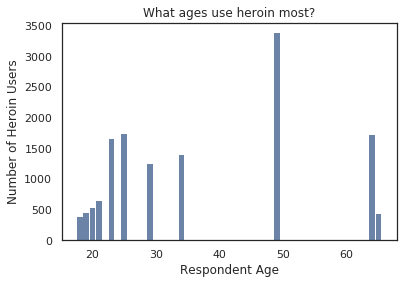

In [12]:
thinkplot.Hist(her_age)
plt.xlabel('Respondent Age') 
plt.ylabel('Number of Heroin Users')
plt.title('What ages use heroin most?')
plt.show()

We must keep in mind that we reinterpreted the data as the upper bound of each age group in the 2002-2016 dataset, and younger age groups are much closer together than older ones. Knowing that, each bar of the histogram should be distributed to its left, until the next upper bound age is reached. Looking at it through this lense, we see that the most heroin users are in their 20s, with a drop off as the respondents get older.

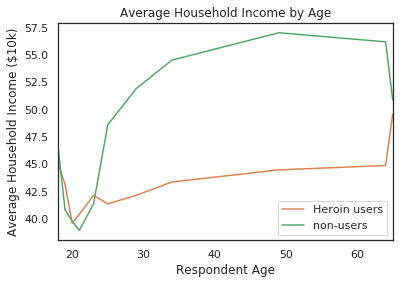

In [13]:
users = nsduh[nsduh.herever == 1]
non_users = nsduh[nsduh.herever == 2]
grouped3 = users.groupby('AGE2')
series1 = grouped3['IRFAMIN3'].mean()
series1.plot(color='C1', label='Heroin users')
grouped4 = non_users.groupby('AGE2')
series2 = grouped4['IRFAMIN3'].mean()
series2.plot(color='C2', label='non-users')
plt.xlabel('Respondent Age') 
plt.ylabel('Average Household Income ($10k)')
plt.title('Average Household Income by Age')
plt.legend()
plt.show()

In [14]:
# Class designed to calculate the p value and effect size of some variable we are testing.
# We group our data by some factor, and then look at one specific variable within each group and calculate the p-value and 
# effect size for that variable.

import math
class DiffMeans(thinkstats2.HypothesisTest):
    
    def TestStatistic(self,data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def EffectSize(self):
        group1, group2 = data
        self.effect_size = ((group1.mean() - group2.mean())/group2.mean())*100
        return self.effect_size

pval_dict = {}
for name, group in grouped3:
    users_loop = grouped3.get_group(name)['IRFAMIN3'].values
    non_users_loop = grouped4.get_group(name)['IRFAMIN3'].values
    data = users_loop, non_users_loop
    ht = DiffMeans(data)
    pval_dict[name] = ht.PValue(), ht.EffectSize()

In [15]:
pval_dict

{18: (0.267, -3.4272186434552245),
 19: (0.08, 5.755194576594024),
 20: (0.861, -0.46309508584623643),
 21: (0.152, 3.78604446401056),
 23: (0.203, 1.8598339580730174),
 25: (0.0, -14.898749608785641),
 29: (0.0, -18.831744920934852),
 34: (0.0, -20.460505265441455),
 49: (0.0, -22.011980831344957),
 64: (0.0, -20.14052612001267),
 65: (0.266, -2.5091936678273066)}

The household incomes of all respondents dips in the late teens and early twenties, but then the users and non-users diverge. The non-users' household incomes greatly increase, while the users household incomes only barely continue rising. At its highest point, the average household income differs by more than $10,000 between heroin users and non-heroin users.

**Effect Size: For most ages heroin user's households make between 15% and 22% less than non-users households**

**P-values: for all large discrepencies within age groups (25, 29, 34, 49), p-values < .001. Unlikely that that discrepency is due to chance**

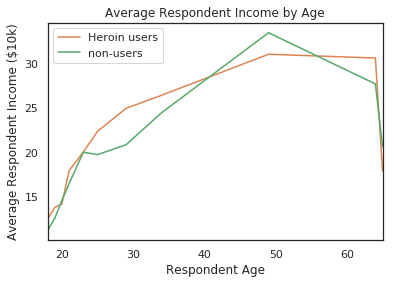

In [16]:
grouped5 = users.groupby('AGE2')
series3 = grouped5['IRPINC3'].mean()
series3.plot(color='C1', label='Heroin users')
grouped6 = non_users.groupby('AGE2')
series4 = grouped6['IRPINC3'].mean()
series4.plot(color='C2', label='non-users')
plt.xlabel('Respondent Age') 
plt.ylabel('Average Respondent Income ($10k)')
plt.title('Average Respondent Income by Age')
plt.legend()
plt.show()

The personal incomes of the users and non-users track each other though. Since these track each other, it could suggest the difference in household incomes is due to non-heroin users getting married at higher rates or getting more education or something along those lines.

Limitations include: As before, the ages are binned, with the older age bins being farther apart than the younger ones. Also, in getting the household income data, we used the upper bound (except for the highest income category, 75k+ which was recoded to 80k) of the income category as the actual numerical income.

In [17]:
married_users = users[(users.NOMARR2 == 1) | (users.NOMARR2 == 2)]
unmarried_users = users[users.NOMARR2 == 0]
married_nonusers = non_users[(non_users.NOMARR2 == 1) | (non_users.NOMARR2 == 2)]
unmarried_nonusers = non_users[non_users.NOMARR2 == 0]
userMarPct = len(married_users)/(len(married_users)+len(unmarried_users))
nonuserMarPct = len(married_nonusers)/(len(married_nonusers)+len(unmarried_nonusers))
userMarPct, nonuserMarPct

(0.3875249900039984, 0.3428117014404864)

Heroin users are getting married at a higher rate. This seems to suggest the difference in incomes is not due to marital status, but we cannot be sure from this data point alone. We must consider the fact that the question regarding marriage asks whether users have been married 0, 1, or 2 or more times, not whether or not they are currently married.

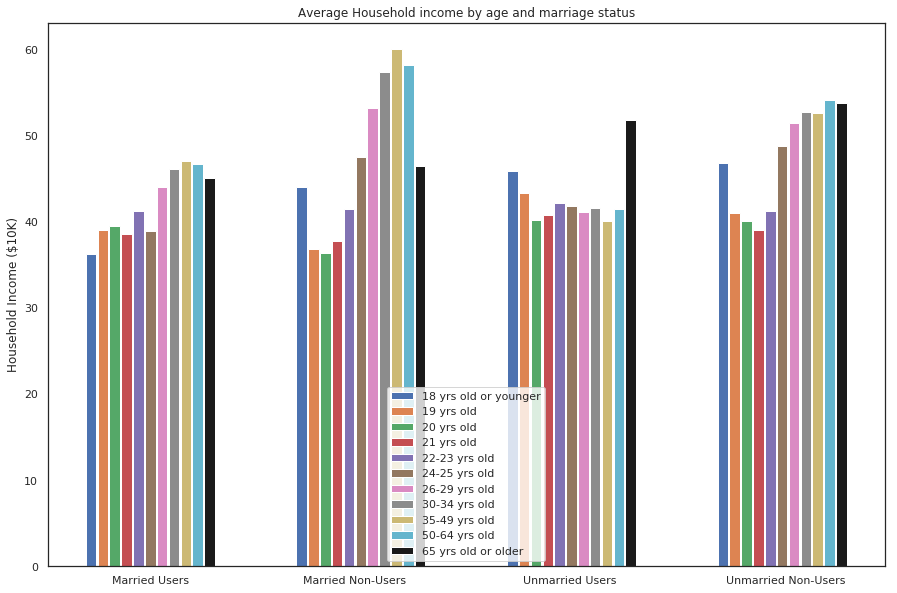

In [18]:
grouped41 = married_users.groupby('AGE2')
grouped42 = unmarried_users.groupby('AGE2')
grouped43 = married_nonusers.groupby('AGE2')
grouped44 = unmarried_nonusers.groupby('AGE2')
i = 0
x=0
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
groups = [grouped41,grouped43,grouped42,grouped44]
for groupedObj in groups:
    for name, group in groupedObj:
        ax.bar(x+i*0.225, group.IRFAMIN3.mean(),width=0.2,color=colors[i],align='center')
        i=i+1
    i=0
    x=x+4

ax.legend(['18 yrs old or younger', '19 yrs old', '20 yrs old', '21 yrs old', '22-23 yrs old', '24-25 yrs old', '26-29 yrs old', '30-34 yrs old', '35-49 yrs old', '50-64 yrs old', '65 yrs old or older'], loc=8)

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([1.125,5,9.1,13.2])
ax.set_xticklabels(('Married Users', 'Married Non-Users', 'Unmarried Users', 'Unmarried Non-Users'))
ax.set_title('Average Household income by age and marriage status')


plt.show()

Across the board, the non-users live in wealthier households, but there is a stark difference between many of the using and non-using age groups that have the same marital status, especially as the age of the respondent gets higher.

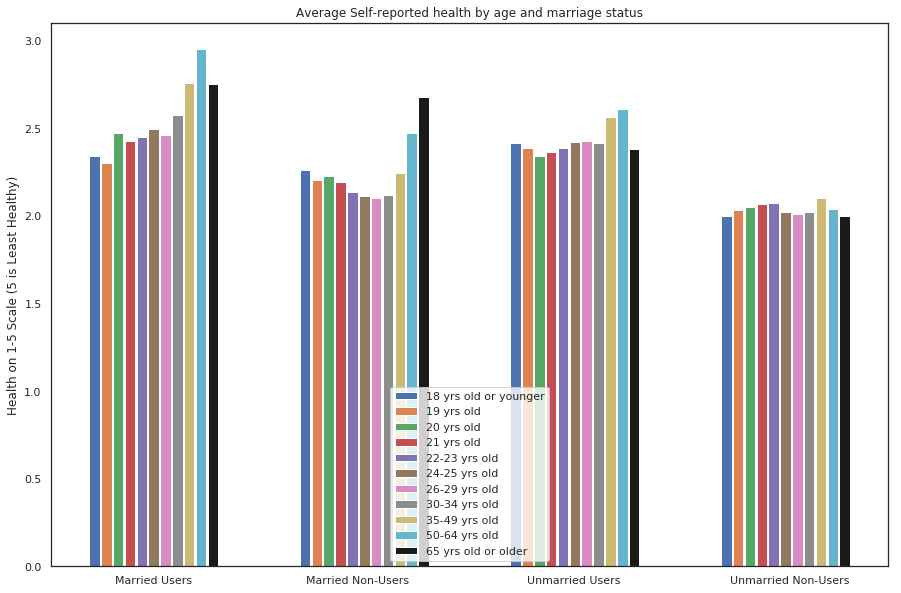

In [19]:
grouped41 = married_users.groupby('AGE2')
grouped42 = unmarried_users.groupby('AGE2')
grouped43 = married_nonusers.groupby('AGE2')
grouped44 = unmarried_nonusers.groupby('AGE2')
i = 0
x=0
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
groups = [grouped41,grouped43,grouped42,grouped44]
for groupedObj in groups:
    for name, group in groupedObj:
        ax.bar(x+i*0.225, group.health.mean(),width=0.2,color=colors[i],align='center')
        i=i+1
    i=0
    x=x+4

ax.legend(['18 yrs old or younger', '19 yrs old', '20 yrs old', '21 yrs old', '22-23 yrs old', '24-25 yrs old', '26-29 yrs old', '30-34 yrs old', '35-49 yrs old', '50-64 yrs old', '65 yrs old or older'], loc=8)

ax.set_ylabel('Health on 1-5 Scale (5 is Least Healthy)')
ax.set_xticks([1.125,5,9.1,13.2])
ax.set_xticklabels(('Married Users', 'Married Non-Users', 'Unmarried Users', 'Unmarried Non-Users'))
ax.set_title('Average Self-reported health by age and marriage status')


plt.show()

This seems to indicate that people who are married self-report their health to be lower on average, and users also self-report their health to be worse on average.

Next, we group users and non-users by whether they've served in the military.

In [20]:
users_served = users[(users.service == 1)]
nonusers_served = non_users[non_users.service == 1]
users_noserved = users[(users.service == 2)]
nonusers_noserved = non_users[non_users.service == 2]
grouped51 = users_served.groupby('year')
grouped52 = users_noserved.groupby('year')
grouped53 = nonusers_served.groupby('year')
grouped54 = nonusers_noserved.groupby('year')

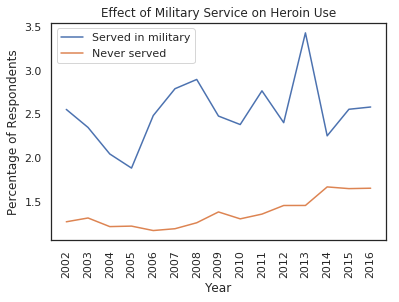

In [21]:
years = []
for name, val in grouped51:
    years.append(name)

    
served_dict = {}
non_served_dict = {}
effect_size_dict = {}
for year in years:
    served_dict[year] = 100*(len(grouped51.get_group(year))/(len(grouped51.get_group(year))+len(grouped53.get_group(year))))
    non_served_dict[year] = 100*(len(grouped52.get_group(year))/(len(grouped52.get_group(year))+len(grouped54.get_group(year))))
    effect_size_dict[year] = 100*(served_dict[year] - non_served_dict[year])/non_served_dict[year]

lists5 = sorted(served_dict.items()) # sorted by key, return a list of tuples
lists6 = sorted(non_served_dict.items())

x5, y5 = zip(*lists5)
x6, y6 = zip(*lists6)# unpack a list of pairs into two tuples

plt.plot(x5, y5, label='Served in military')
plt.plot(x6, y6, label='Never served')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents')
plt.title('Effect of Military Service on Heroin Use')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

The percentage of repondents who have used heroin is far higher amongst those who have served in the military than amongst the general population.

In [22]:
effect_size_dict

{'2002': 100.93934584328039,
 '2003': 78.62515405968877,
 '2004': 68.18232058201109,
 '2005': 54.21976324293227,
 '2006': 112.07410879802259,
 '2007': 134.10005461818932,
 '2008': 129.83338184427308,
 '2009': 79.12210390915564,
 '2010': 82.53155295408817,
 '2011': 103.56861495449178,
 '2012': 64.89079222894371,
 '2013': 135.1853136535186,
 '2014': 34.94191638919719,
 '2015': 54.911947513812144,
 '2016': 56.04110434385982}

Having served in the military increases the chance you have ever used heroin by more than +100% in some years!

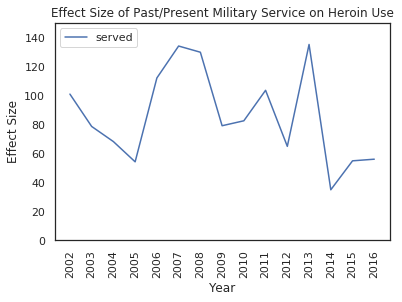

In [23]:
lists5 = sorted(effect_size_dict.items()) # sorted by key, return a list of tuples
x5, y5 = zip(*lists5)

plt.plot(x5, y5, label='served')
plt.xlabel('Year')
plt.ylabel('Effect Size')
plt.title('Effect Size of Past/Present Military Service on Heroin Use')
plt.legend()
plt.xticks(rotation = 90)
plt.ylim([0, 150])
plt.show()

Visualization of the Effect Size of military service on heroin use.

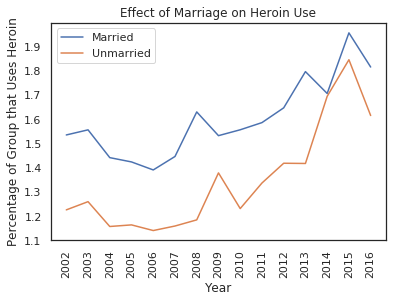

In [24]:
grouped41 = married_users.groupby('year')
grouped42 = unmarried_users.groupby('year')
grouped43 = married_nonusers.groupby('year')
grouped44 = unmarried_nonusers.groupby('year')

years = []
for name, val in grouped51:
    years.append(name)

    
mar_dict = {}
non_mar_dict = {}
for year in years:
    mar_dict[year] = 100*(len(grouped41.get_group(year))/(len(grouped41.get_group(year))+len(grouped43.get_group(year))))
    non_mar_dict[year] = 100*(len(grouped42.get_group(year))/(len(grouped42.get_group(year))+len(grouped44.get_group(year))))

lists5 = sorted(mar_dict.items()) # sorted by key, return a list of tuples
lists6 = sorted(non_mar_dict.items())

x5, y5 = zip(*lists5)
x6, y6 = zip(*lists6)# unpack a list of pairs into two tuples

plt.plot(x5, y5, label='Married')
plt.plot(x6, y6, label='Unmarried')
plt.xlabel('Year')
plt.ylabel('Percentage of Group that Uses Heroin')
plt.title('Effect of Marriage on Heroin Use')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

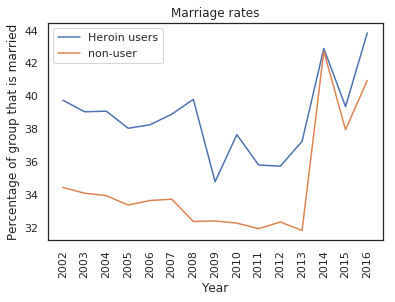

In [25]:
use_dict = {}
non_use_dict = {}
for year in years:
    use_dict[year] = 100*(len(grouped41.get_group(year))/(len(grouped41.get_group(year))+len(grouped42.get_group(year))))
    non_use_dict[year] = 100*(len(grouped43.get_group(year))/(len(grouped43.get_group(year))+len(grouped44.get_group(year))))

lists5 = sorted(use_dict.items()) # sorted by key, return a list of tuples
lists6 = sorted(non_use_dict.items())

x5, y5 = zip(*lists5)
x6, y6 = zip(*lists6)# unpack a list of pairs into two tuples

plt.plot(x5, y5, label='Heroin users')
plt.plot(x6, y6, label='non-user')
plt.xlabel('Year')
plt.ylabel('Percentage of group that is married')
plt.title('Marriage rates')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

Your earning potential certainly seems higher across the board if you are not using heroin. Those who are married also seem to earn more regardless of the use of drugs.

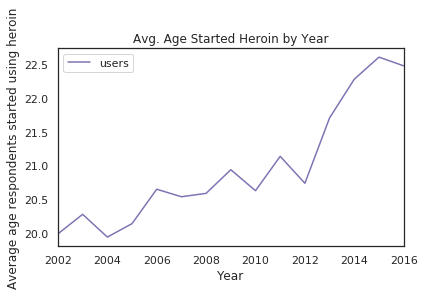

In [26]:
grouped3 = users.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(color='C4', label='users')
decorate(xlabel='Year', 
         ylabel='Average age respondents started using heroin',
         title='Avg. Age Started Heroin by Year')

The average age of people starting to use heroin has jumped by 2 years between 2002 and 2014 (an increase of 13%). This would suggest opioids are starting to creep into the lives of people besides those in their teens and twenties.

**Effect Size: +13%**

Next, we'll look into this more by plotting the starting age percentiles of heroin users over time.

In [27]:
from thinkstats2 import Pmf, Cdf
ps = [95, 75, 50, 25, 5]
res = []
grouped3 = users.groupby('year')
for name, group in grouped3['herage']:
    percentiles = Cdf(group).Percentiles(ps)
    res.append(percentiles)
xs = grouped3.groups.keys()
xs = sorted(xs)
rows = np.transpose(res)

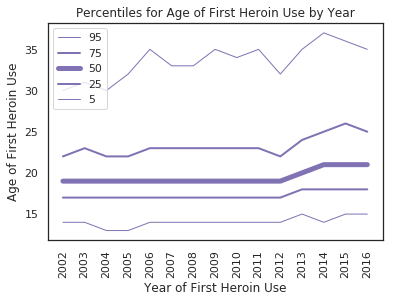

In [28]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
plt.xlabel('Year of First Heroin Use')
plt.ylabel('Age of First Heroin Use')
plt.title('Percentiles for Age of First Heroin Use by Year')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

All percentiles were pretty steady until 2012, when they began to increase in heroin use a little bit. It looks like the average starting age for all percentiles besides the lowest percentile (5% - teens) is increasing.

The cell below combined the use of heroin and painkiller users into a single dataframe called users, and the non-users into a separate dataframe. This will allow us to analyze trends beyond those that just apply to heroin or painkillers individually. Note that the data for this variable regarding non-medical painkiller use ended in 2014.

In [29]:
grouped = nsduh.groupby(['herever', 'anlever'])
grouped2 = nsduh.groupby(['year','herever'])
df4 = grouped2.get_group(('2015',1.0))
df5 = grouped2.get_group(('2016',1.0))
df1 = grouped.get_group((1.0,1.0))
df2 = grouped.get_group((2.0,1.0))
df3 = grouped.get_group((1.0,2.0))
users = pd.concat([df1, df2, df3, df4, df5])
time_users = users.groupby('year')
non_users = grouped.get_group((2.0,2.0))

Now we'll look at average age of both first time heroin users and first time painkiller users.

In [30]:
d_her = dict()
d_an = dict()
for x in list(range(2002,2017)):
    df = time_users.get_group(str(x))
    her_val = sum(df['herage'].dropna())/len(df['herage'].dropna())
    if x<=2014:
        an_val = sum(df['analage'].dropna())/len(df['analage'].dropna())
        d_an[x] = an_val
    d_her[x] = her_val

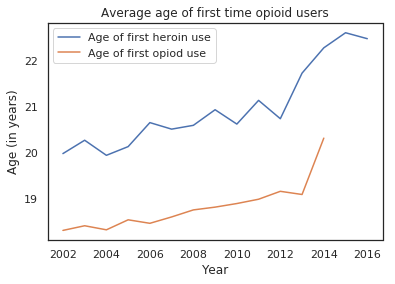

In [31]:
plt.plot(list(d_her.keys()),list(d_her.values()),label='Age of first heroin use')
plt.plot(list(d_an.keys()),list(d_an.values()), label='Age of first opiod use')
plt.xlabel('Year')
plt.ylabel('Age (in years)')
plt.title('Average age of first time opioid users')
plt.legend()
plt.show()

It appears that both painkiller use and heroin use are increasing in recent years. Unfortunately, the data for painkiller ended in 2014, as we mentioned earlier.

We'll also group people into dataframes representing the areas they live in. The question code changed, but the question remained nearly the same, which is why we checked both 'COUTYP2' and 'COUTYP4'.

In [32]:
urban = nsduh[(nsduh.COUTYP2 == 1) | (nsduh.COUTYP4 == 1)]
suburb = nsduh[(nsduh.COUTYP2 == 2) | (nsduh.COUTYP4 == 2)]
rural = nsduh[(nsduh.COUTYP2 == 3) | (nsduh.COUTYP4 == 3)]

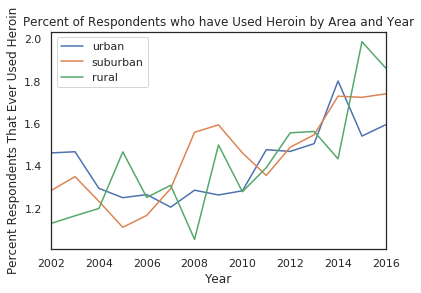

In [33]:
grouped3 = urban.groupby('year')
series1 = 100*(2- grouped3['herever'].mean())
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = 100*(2 - grouped4['herever'].mean())
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = 100*(2 - grouped5['herever'].mean())
series3.plot(label='rural')
plt.xlabel('Year')
plt.ylabel('Percent Respondents That Ever Used Heroin')
plt.title('Percent of Respondents who have Used Heroin by Area and Year')
plt.legend()
plt.show()

We plotted the percentage of heroin users in the population by the area in which the population lived (rural, urban, suburban - or, more technically, nonmetro, large metro, and small metro, respectively) The areas don't seem to be all that different. It is interesting, though, that suburban use has increased the most, while urban use has increased the less. The increase in heroin use is greatest in rural areas and smallest in urban areas.

In [34]:
pval_dict = {}
for name, group in grouped3:
    users_loop = grouped3.get_group(name)['herever'].values
    non_users_loop = grouped5.get_group(name)['herever'].values
    data = users_loop, non_users_loop
    ht = DiffMeans(data)
    pval_dict[name] = ht.PValue(), ht.EffectSize()

In [35]:
pval_dict

{'2002': (0.0, nan),
 '2003': (0.0, nan),
 '2004': (0.0, nan),
 '2005': (0.0, nan),
 '2006': (0.0, nan),
 '2007': (0.0, nan),
 '2008': (0.0, nan),
 '2009': (0.0, nan),
 '2010': (0.0, nan),
 '2011': (0.0, nan),
 '2012': (0.0, nan),
 '2013': (0.0, nan),
 '2014': (0.0, nan),
 '2015': (0.0, nan),
 '2016': (0.0, nan)}

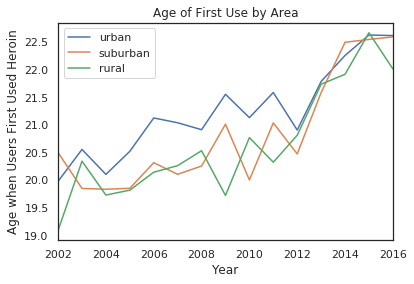

In [36]:
grouped3 = urban.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = grouped4['herage'].mean()
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = grouped5['herage'].mean()
series3.plot(label='rural')
plt.xlabel('Year')
plt.ylabel('Age when Users First Used Heroin')
plt.title('Age of First Use by Area')
plt.legend()
plt.show()

The age of heroin first use is rising everywhere. It does not appear to be purely a function of where you live, at least in this dataset.

Now, we'll further group the respondents by both the area they live in and whether or not they use heroin or non-medically use painkillers.

In [37]:
urban_users = users[(users.COUTYP2 == 1) | (users.COUTYP4 == 1)]
suburb_users = users[(users.COUTYP2 == 2) | (users.COUTYP4 == 2)]
rural_users = users[(users.COUTYP2 == 3) | (users.COUTYP4 == 3)]
urban_nonusers = non_users[(non_users.COUTYP2 == 1) | (non_users.COUTYP4 == 1)]
suburb_nonusers = non_users[(non_users.COUTYP2 == 2) | (non_users.COUTYP4 == 2)]
rural_nonusers = non_users[(non_users.COUTYP2 == 3) | (non_users.COUTYP4 == 3)]

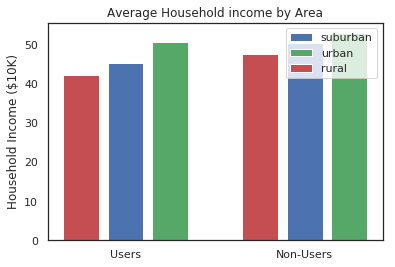

In [38]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Household income by Area')

plt.show()

Users and non-users are pretty similar here. Those in urban areas tend to have the highest household incomes, with those in rural areas having the lowest household income. The data for users suggest users have lower household incomes across the board by a few thousand dollars. Again, we must acknowledge that in getting the household income data, we used the upper bound (roughly, except for the highest income category) of the income category as the actual numerical income.

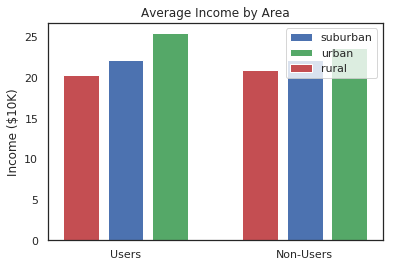

In [39]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Income by Area')

plt.show()

Users and non-users (of heroin and non-medical painkillers) are even more similar here in terms of their own average incomes.

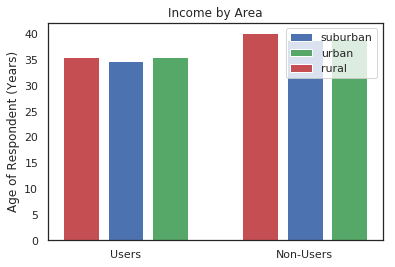

In [40]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['AGE2'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['AGE2'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Age of Respondent (Years)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Income by Area')

plt.show()

Non-user respondents appear to be older across the board. In other words, of those who responded to the survey, those who had used painkillers or heroin tended to be younger than those who hadn't.